In [1]:
import numpy as np
import pandas as pd
import time
import os
import pickle
import string
import psutil
import sklearn

%matplotlib inline
import matplotlib.pyplot as plt

import time
from sklearn.manifold import TSNE
import math
import seaborn as sns

from sklearn.decomposition import PCA
from ggplot import *
from pandas.tools.plotting import table
from sklearn.metrics.pairwise import cosine_similarity

/usr/local/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Load the trained model  ( categoy 6, category 7 and combined)

In [106]:
# For category 6, the model was run with embeddings of 150 dimensions
trained_firm_emb_cat6 = pickle.load(open("/data/WorkData/firmEmbeddings/Models/FirmEmbeddings/trainedModel_cat6.pkl","rb"))
trained_firm_emb_cat7 = pickle.load(open("/data/WorkData/firmEmbeddings/Models/FirmEmbeddings/trainedModel_cat7_50dim.pkl","rb"))
trained_firm_emb = pickle.load(open("/data/WorkData/firmEmbeddings/Models/FirmEmbeddings/trainedModel_full.pkl","rb"))

# Load firm's meta data
## The meta data contains :
### City, State, NAICS, and SAP Rank 

In [4]:
firm_metadata = pickle.load(open("/data/WorkData/firmEmbeddings/JoinDataPrep/Company_meta.pkl","rb"))
firm_metadata_rank = pickle.load(open("/data/WorkData/firmEmbeddings/JoinDataPrep/Company_meta_rank.pkl","rb"))

# Display dimensions of the firm model
## There are 709 firms and each one is converted into a vector of 50 dimensions


In [105]:
trained_firm_emb.shape

(709, 50)

In [6]:
trained_firm_emb_cat7.shape

(709, 50)

# Display Firm vectors

In [7]:
trained_firm_emb

array([[-1.4254234 , -2.3437731 , -0.35677058, ..., -0.05798046,
        -0.70088494, -1.707533  ],
       [-0.58615   , -2.1590505 , -0.3915855 , ..., -0.0213643 ,
        -0.46964517, -1.5195581 ],
       [-0.62417316, -2.171628  ,  0.01345576, ..., -0.12092682,
        -0.4901905 , -1.3831654 ],
       ...,
       [-0.48132882, -3.1169748 , -0.4416707 , ..., -0.13278615,
        -0.5031662 , -2.109221  ],
       [-1.0194558 , -2.8546462 , -0.18857181, ..., -0.20388333,
        -1.1373366 , -1.9055929 ],
       [-0.5344685 , -2.5627518 , -0.07417244, ..., -0.24770892,
        -0.68794835, -1.6129342 ]], dtype=float32)

In [8]:
trained_firm_emb_cat7

array([[-1.4599695 , -1.7132171 , -0.28085282, ..., -1.3587035 ,
        -1.1623987 , -1.5784663 ],
       [-0.86632836, -0.7181418 , -0.6193578 , ..., -0.9801835 ,
        -0.87677646, -1.4237553 ],
       [-0.7299734 , -2.0324464 , -0.38609356, ..., -1.2452939 ,
        -0.76017123, -1.4110821 ],
       ...,
       [-0.69569623, -2.1327732 , -0.73752254, ..., -1.2648175 ,
        -0.97800285, -1.5840191 ],
       [-0.9025619 , -2.2000864 , -0.44775936, ..., -1.2546911 ,
        -1.5681647 , -1.5266567 ],
       [-0.6845504 , -2.1020415 , -0.3732625 , ..., -1.3952588 ,
        -1.0984393 , -1.5266112 ]], dtype=float32)

# Display firms meta data

In [9]:
firm_metadata

,CompanyName,ID,State,City,NAICS
0,AAR CORP,0,IL,Wood Dale,42
1,AVX CORP,1,SC,Fountain Inn,33
2,AARON'S INC,2,GA,Atlanta,53
3,ABBOTT LABORATORIES,3,IL,Abbott Park,32
4,ALEXANDER'S INC,4,NJ,Paramus,53
5,ALLEGHANY CORP,5,NY,New York,52
6,US ECOLOGY INC,6,ID,Boise,56
7,ASTRONICS CORP,7,NY,East Aurora,33
8,A V HOMES INC,8,AZ,Scottsdale,23
9,BARNWELL INDUSTRIES,9,HI,Honolulu,23


In [10]:
firm_names = firm_metadata['CompanyName'].tolist()

In [11]:
firm_names

['AAR CORP',
 'AVX CORP',
 "AARON'S INC",
 'ABBOTT LABORATORIES',
 "ALEXANDER'S INC",
 'ALLEGHANY CORP',
 'US ECOLOGY INC',
 'ASTRONICS CORP',
 'A V HOMES INC',
 'BARNWELL INDUSTRIES',
 'BASSETT FURNITURE INDS',
 'CALERES INC',
 'CARDINAL HEALTH INC',
 'CARLISLE COS INC',
 'CHECKPOINT SYSTEMS INC',
 'CHYRONHEGO CORP',
 'CITY NATIONAL CORP',
 'CLOROX CO/DE',
 'CONAGRA BRANDS INC',
 'RAVE RESTAURANT GROUP INC',
 'TRANSCONTINENTAL RLTY INVS',
 'CON-WAY INC',
 'CONTINENTAL MATERIALS CORP',
 'CULP INC',
 'CUMMINS INC',
 'DATARAM CORP - OLD',
 'DELTA NATURAL GAS CO INC',
 'ADTALEM GLOBAL EDUCATION INC',
 'DIODES INC',
 'DUCOMMUN INC',
 'ELECTRO-SENSORS INC',
 'ENERGEN CORP',
 'ENZON PHARMACEUTICALS INC',
 'NEWMARKET CORP',
 'EXPEDITORS INTL WASH INC',
 'SCHAWK INC  -CL A',
 'REGIONS FINANCIAL CORP',
 'FOREST LABORATORIES  -CL A',
 'FREQUENCY ELECTRONICS INC',
 'TEGNA INC',
 'GAP INC',
 'GOLDEN ENTERPRISES',
 'HAWKINS INC',
 'WELLTOWER INC',
 'HEXCEL CORP',
 'HOOPER HOLMES INC',
 'HOVNANIAN E

#  Calculate cosine similarity between the firms

In [12]:
cosine_sim = cosine_similarity(trained_firm_emb)

In [13]:
cosine_sim

array([[1.        , 0.95172393, 0.93132496, ..., 0.9196091 , 0.949473  ,
        0.9405471 ],
       [0.95172393, 1.0000001 , 0.93373024, ..., 0.9402654 , 0.9582252 ,
        0.9562451 ],
       [0.93132496, 0.93373024, 1.        , ..., 0.9309998 , 0.9339712 ,
        0.95893705],
       ...,
       [0.9196091 , 0.9402654 , 0.9309998 , ..., 1.        , 0.9496267 ,
        0.9529298 ],
       [0.949473  , 0.9582252 , 0.9339712 , ..., 0.9496267 , 1.0000001 ,
        0.9477779 ],
       [0.9405471 , 0.9562451 , 0.95893705, ..., 0.9529298 , 0.9477779 ,
        1.0000001 ]], dtype=float32)

In [14]:
cosine_sim.shape

(709, 709)

In [15]:
 cosine_sim_df = pd.DataFrame(cosine_sim)

In [16]:
cosine_sim_df

,0,1,2,3,4,5,6,7,8,9,...,699,700,701,702,703,704,705,706,707,708
0,1.000000,0.951724,0.931325,0.944847,0.896468,0.931607,0.922152,0.912585,0.946674,0.927105,...,0.906696,0.945990,0.965103,0.914597,0.905080,0.907827,0.935230,0.919609,0.949473,0.940547
1,0.951724,1.000000,0.933730,0.924228,0.893770,0.908207,0.909429,0.924293,0.911230,0.912601,...,0.908250,0.944928,0.965134,0.879808,0.919279,0.936567,0.933957,0.940265,0.958225,0.956245
2,0.931325,0.933730,1.000000,0.931270,0.912238,0.921140,0.937353,0.950436,0.915815,0.931530,...,0.934255,0.922630,0.960991,0.910418,0.935201,0.949531,0.945687,0.931000,0.933971,0.958937
3,0.944847,0.924228,0.931270,1.000000,0.908437,0.930180,0.957034,0.935826,0.939521,0.891800,...,0.903002,0.932083,0.946370,0.928045,0.941431,0.931404,0.941895,0.921890,0.956803,0.928934
4,0.896468,0.893770,0.912238,0.908437,1.000000,0.917145,0.918029,0.887055,0.892336,0.886234,...,0.889989,0.919734,0.930077,0.889862,0.890543,0.901961,0.895272,0.904079,0.899602,0.919373
5,0.931607,0.908207,0.921140,0.930180,0.917145,1.000000,0.933643,0.919482,0.955791,0.899864,...,0.914100,0.919986,0.932116,0.944895,0.925799,0.890093,0.917121,0.909809,0.936135,0.936319
6,0.922152,0.909429,0.937353,0.957034,0.918029,0.933643,1.000000,0.947061,0.920212,0.900407,...,0.929297,0.918161,0.940261,0.938968,0.940098,0.910649,0.942560,0.945239,0.948171,0.946170
7,0.912585,0.924293,0.950436,0.935826,0.887055,0.919482,0.947061,1.000000,0.933895,0.886702,...,0.899509,0.898595,0.947402,0.926824,0.946476,0.930147,0.936372,0.906281,0.944267,0.944041
8,0.946674,0.911230,0.915815,0.939521,0.892336,0.955791,0.920212,0.933895,1.000000,0.892247,...,0.887305,0.905035,0.939779,0.948634,0.907635,0.897985,0.915288,0.890352,0.927116,0.941042
9,0.927105,0.912601,0.931530,0.891800,0.886234,0.899864,0.900407,0.886702,0.892247,1.000000,...,0.913862,0.942378,0.946787,0.869635,0.898040,0.909441,0.923918,0.947009,0.920742,0.943503


In [17]:
cosine_sim_df.columns = firm_names

In [21]:
cosine_sim_df

,AAR CORP,AVX CORP,AARON'S INC,ABBOTT LABORATORIES,ALEXANDER'S INC,ALLEGHANY CORP,US ECOLOGY INC,ASTRONICS CORP,A V HOMES INC,BARNWELL INDUSTRIES,...,K-SWISS INC -CL A,BLACKROCK MUNI 2018 TERM TR,NUVEEN ARIZ DIVID ADV MUN FD,COMMUNITY FINANCIAL CORP/VA,TITANIUM METALS CORP,ROBBINS & MYERS INC,NUVEEN MICH PREM INCM MUN FD,SUNRISE SENIOR LIVING INC,ALLIANCE BANKSHARES CORP,CARIBOU COFFEE CO
0,1.000000,0.951724,0.931325,0.944847,0.896468,0.931607,0.922152,0.912585,0.946674,0.927105,...,0.906696,0.945990,0.965103,0.914597,0.905080,0.907827,0.935230,0.919609,0.949473,0.940547
1,0.951724,1.000000,0.933730,0.924228,0.893770,0.908207,0.909429,0.924293,0.911230,0.912601,...,0.908250,0.944928,0.965134,0.879808,0.919279,0.936567,0.933957,0.940265,0.958225,0.956245
2,0.931325,0.933730,1.000000,0.931270,0.912238,0.921140,0.937353,0.950436,0.915815,0.931530,...,0.934255,0.922630,0.960991,0.910418,0.935201,0.949531,0.945687,0.931000,0.933971,0.958937
3,0.944847,0.924228,0.931270,1.000000,0.908437,0.930180,0.957034,0.935826,0.939521,0.891800,...,0.903002,0.932083,0.946370,0.928045,0.941431,0.931404,0.941895,0.921890,0.956803,0.928934
4,0.896468,0.893770,0.912238,0.908437,1.000000,0.917145,0.918029,0.887055,0.892336,0.886234,...,0.889989,0.919734,0.930077,0.889862,0.890543,0.901961,0.895272,0.904079,0.899602,0.919373
5,0.931607,0.908207,0.921140,0.930180,0.917145,1.000000,0.933643,0.919482,0.955791,0.899864,...,0.914100,0.919986,0.932116,0.944895,0.925799,0.890093,0.917121,0.909809,0.936135,0.936319
6,0.922152,0.909429,0.937353,0.957034,0.918029,0.933643,1.000000,0.947061,0.920212,0.900407,...,0.929297,0.918161,0.940261,0.938968,0.940098,0.910649,0.942560,0.945239,0.948171,0.946170
7,0.912585,0.924293,0.950436,0.935826,0.887055,0.919482,0.947061,1.000000,0.933895,0.886702,...,0.899509,0.898595,0.947402,0.926824,0.946476,0.930147,0.936372,0.906281,0.944267,0.944041
8,0.946674,0.911230,0.915815,0.939521,0.892336,0.955791,0.920212,0.933895,1.000000,0.892247,...,0.887305,0.905035,0.939779,0.948634,0.907635,0.897985,0.915288,0.890352,0.927116,0.941042
9,0.927105,0.912601,0.931530,0.891800,0.886234,0.899864,0.900407,0.886702,0.892247,1.000000,...,0.913862,0.942378,0.946787,0.869635,0.898040,0.909441,0.923918,0.947009,0.920742,0.943503


In [18]:
cos_sim_df =pd.DataFrame(cosine_sim_df).T

In [19]:
cos_sim_df

,0,1,2,3,4,5,6,7,8,9,...,699,700,701,702,703,704,705,706,707,708
AAR CORP,1.000000,0.951724,0.931325,0.944847,0.896468,0.931607,0.922152,0.912585,0.946674,0.927105,...,0.906696,0.945990,0.965103,0.914597,0.905080,0.907827,0.935230,0.919609,0.949473,0.940547
AVX CORP,0.951724,1.000000,0.933730,0.924228,0.893770,0.908207,0.909429,0.924293,0.911230,0.912601,...,0.908250,0.944928,0.965134,0.879808,0.919279,0.936567,0.933957,0.940265,0.958225,0.956245
AARON'S INC,0.931325,0.933730,1.000000,0.931270,0.912238,0.921140,0.937353,0.950436,0.915815,0.931530,...,0.934255,0.922630,0.960991,0.910418,0.935201,0.949531,0.945687,0.931000,0.933971,0.958937
ABBOTT LABORATORIES,0.944847,0.924228,0.931270,1.000000,0.908437,0.930180,0.957034,0.935826,0.939521,0.891800,...,0.903002,0.932083,0.946370,0.928045,0.941431,0.931404,0.941895,0.921890,0.956803,0.928934
ALEXANDER'S INC,0.896468,0.893770,0.912238,0.908437,1.000000,0.917145,0.918029,0.887055,0.892336,0.886234,...,0.889989,0.919734,0.930077,0.889862,0.890543,0.901961,0.895272,0.904079,0.899602,0.919373
ALLEGHANY CORP,0.931607,0.908207,0.921140,0.930180,0.917145,1.000000,0.933643,0.919482,0.955791,0.899864,...,0.914100,0.919986,0.932116,0.944895,0.925799,0.890093,0.917121,0.909809,0.936135,0.936319
US ECOLOGY INC,0.922152,0.909429,0.937353,0.957034,0.918029,0.933643,1.000000,0.947061,0.920212,0.900407,...,0.929297,0.918161,0.940261,0.938968,0.940098,0.910649,0.942560,0.945239,0.948171,0.946170
ASTRONICS CORP,0.912585,0.924293,0.950436,0.935826,0.887055,0.919482,0.947061,1.000000,0.933895,0.886702,...,0.899509,0.898595,0.947402,0.926824,0.946476,0.930147,0.936372,0.906281,0.944267,0.944041
A V HOMES INC,0.946674,0.911230,0.915815,0.939521,0.892336,0.955791,0.920212,0.933895,1.000000,0.892247,...,0.887305,0.905035,0.939779,0.948634,0.907635,0.897985,0.915288,0.890352,0.927116,0.941042
BARNWELL INDUSTRIES,0.927105,0.912601,0.931530,0.891800,0.886234,0.899864,0.900407,0.886702,0.892247,1.000000,...,0.913862,0.942378,0.946787,0.869635,0.898040,0.909441,0.923918,0.947009,0.920742,0.943503


# 4 Top most similar firms to a firm based on their cosine similarity 

In [20]:

result = pd.DataFrame(np.zeros((0,5)), columns=['Self','MostSimilar_1','MostSimilar_2','MostSimilar_3','MostSimilar_4'])

for i in cos_sim_df.columns:
    df1row = pd.DataFrame(cos_sim_df.nlargest(5, i).index.tolist(), index=['Self','MostSimilar_1','MostSimilar_2','MostSimilar_3','MostSimilar_4']).T
    result = pd.concat([result, df1row], axis=0)

result

,Self,MostSimilar_1,MostSimilar_2,MostSimilar_3,MostSimilar_4
0,AAR CORP,DIODES INC,BIOMED REALTY TRUST INC,GASCO ENERGY INC,COMMUNITY BANKERS TRUST CORP
0,AVX CORP,NUVEEN ARIZ DIVID ADV MUN FD,HAEMONETICS CORP,SIRONA DENTAL SYSTEMS INC,OXFORD INDUSTRIES INC
0,AARON'S INC,TTM TECHNOLOGIES INC,GAP INC,OGE ENERGY CORP,ATRICURE INC
0,ABBOTT LABORATORIES,UNITED CAPITAL CORP,WINTRUST FINANCIAL CORP,ROCKWOOD HOLDINGS INC,ANADARKO PETROLEUM CORP
0,ALEXANDER'S INC,BASIC ENERGY SERVICES INC,DREYFUS STRATEGIC MUNI,CAROLINA BANK HOLDINGS INC,SOUTHWEST GEORGIA FINL CORP
0,ALLEGHANY CORP,BANK SOUTH CAROLINA CORP,ORMAT TECHNOLOGIES INC,ENERGY SERVICES OF AMERICA,A V HOMES INC
0,US ECOLOGY INC,INNOSPEC INC,CITY NATIONAL CORP,TOFUTTI BRANDS INC,INTERACTIVE BROKERS GROUP
0,ASTRONICS CORP,NUVEEN CAL PERFORM PLUS MUN,FALCONSTOR SOFTWARE INC,STATE AUTO FINANCIAL CORP,NUVEEN N Y SELECT QTY MUN FD
0,A V HOMES INC,CONNECTICUT WATER SVC INC,ENERGY SERVICES OF AMERICA,ORMAT TECHNOLOGIES INC,DIAMOND HILL INVESTMENT GRP
0,BARNWELL INDUSTRIES,FMC TECHNOLOGIES INC,CRESTWOOD MIDSTREAM PTNRS LP,BLACKROCK REAL ASSET EQTY TR,INTERCONTINENTAL EXCHANGE


In [21]:
cols = ['MostSimilar_1','Industry_firm1']
firm_name_with_industry_1 = firm_metadata[['CompanyName','NAICS']]
firm_name_with_industry_1.columns = cols

cols = ['MostSimilar_2','Industry_firm2']
firm_name_with_industry_2 = firm_metadata[['CompanyName','NAICS']]
firm_name_with_industry_2.columns = cols

cols = ['MostSimilar_3','Industry_firm3']
firm_name_with_industry_3 = firm_metadata[['CompanyName','NAICS']]
firm_name_with_industry_3.columns = cols

cols = ['MostSimilar_4','Industry_firm4']
firm_name_with_industry_4 = firm_metadata[['CompanyName','NAICS']]
firm_name_with_industry_4.columns = cols

In [22]:
self_industry = ['Self','Self_Industry']

In [23]:
self_with_industry = firm_metadata[['CompanyName','NAICS']]

In [24]:
self_with_industry.columns = self_industry

In [25]:
self_with_industry

,Self,Self_Industry
0,AAR CORP,42
1,AVX CORP,33
2,AARON'S INC,53
3,ABBOTT LABORATORIES,32
4,ALEXANDER'S INC,53
5,ALLEGHANY CORP,52
6,US ECOLOGY INC,56
7,ASTRONICS CORP,33
8,A V HOMES INC,23
9,BARNWELL INDUSTRIES,23


In [26]:
joined_firm_self_industry = pd.merge(self_with_industry, result, on='Self', how='inner')

# Similar firms with their NAICS code

In [27]:
joined_firm_self_industry

,Self,Self_Industry,MostSimilar_1,MostSimilar_2,MostSimilar_3,MostSimilar_4
0,AAR CORP,42,DIODES INC,BIOMED REALTY TRUST INC,GASCO ENERGY INC,COMMUNITY BANKERS TRUST CORP
1,AVX CORP,33,NUVEEN ARIZ DIVID ADV MUN FD,HAEMONETICS CORP,SIRONA DENTAL SYSTEMS INC,OXFORD INDUSTRIES INC
2,AARON'S INC,53,TTM TECHNOLOGIES INC,GAP INC,OGE ENERGY CORP,ATRICURE INC
3,ABBOTT LABORATORIES,32,UNITED CAPITAL CORP,WINTRUST FINANCIAL CORP,ROCKWOOD HOLDINGS INC,ANADARKO PETROLEUM CORP
4,ALEXANDER'S INC,53,BASIC ENERGY SERVICES INC,DREYFUS STRATEGIC MUNI,CAROLINA BANK HOLDINGS INC,SOUTHWEST GEORGIA FINL CORP
5,ALLEGHANY CORP,52,BANK SOUTH CAROLINA CORP,ORMAT TECHNOLOGIES INC,ENERGY SERVICES OF AMERICA,A V HOMES INC
6,US ECOLOGY INC,56,INNOSPEC INC,CITY NATIONAL CORP,TOFUTTI BRANDS INC,INTERACTIVE BROKERS GROUP
7,ASTRONICS CORP,33,NUVEEN CAL PERFORM PLUS MUN,FALCONSTOR SOFTWARE INC,STATE AUTO FINANCIAL CORP,NUVEEN N Y SELECT QTY MUN FD
8,A V HOMES INC,23,CONNECTICUT WATER SVC INC,ENERGY SERVICES OF AMERICA,ORMAT TECHNOLOGIES INC,DIAMOND HILL INVESTMENT GRP
9,BARNWELL INDUSTRIES,23,FMC TECHNOLOGIES INC,CRESTWOOD MIDSTREAM PTNRS LP,BLACKROCK REAL ASSET EQTY TR,INTERCONTINENTAL EXCHANGE


In [28]:
joined_firm_self_industry_sim = pd.merge(joined_firm_self_industry,firm_name_with_industry_1, on='MostSimilar_1', how='inner')

joined_firm_self_industry_sim = pd.merge(joined_firm_self_industry_sim,firm_name_with_industry_2, on='MostSimilar_2', how='inner')

joined_firm_self_industry_sim = pd.merge(joined_firm_self_industry_sim,firm_name_with_industry_3, on='MostSimilar_3', how='inner')

joined_firm_self_industry_sim = pd.merge(joined_firm_self_industry_sim,firm_name_with_industry_4, on='MostSimilar_4', how='inner')


In [29]:
Self_Industry = joined_firm_self_industry_sim['Self_Industry']
joined_firm_self_industry_sim = joined_firm_self_industry_sim.drop('Self_Industry',axis=1)

In [30]:
joined_firm_self_industry_sim['Self_Industry'] = Self_Industry

In [31]:
joined_firm_self_industry_sim

,Self,MostSimilar_1,MostSimilar_2,MostSimilar_3,MostSimilar_4,Industry_firm1,Industry_firm2,Industry_firm3,Industry_firm4,Self_Industry
0,AAR CORP,DIODES INC,BIOMED REALTY TRUST INC,GASCO ENERGY INC,COMMUNITY BANKERS TRUST CORP,33,53,21,52,42
1,WEB.COM GROUP INC,ENERGY SERVICES OF AMERICA,CONNECTICUT WATER SVC INC,CONTINENTAL RESOURCES INC,COMMUNITY BANKERS TRUST CORP,23,22,21,52,51
2,SENSIENT TECHNOLOGIES CORP,BLUE NILE INC,WEB.COM GROUP INC,TOFUTTI BRANDS INC,COMMUNITY BANKERS TRUST CORP,44,51,31,52,32
3,ALLIANCEBERNSTEIN INCOME FD,HIBBETT SPORTS INC,SUNESIS PHARMACEUTICALS INC,CHELSEA THERAPEUTICS INTL,COMMUNITY BANKERS TRUST CORP,45,32,32,52,52
4,COHEN & STEERS REIT & PFD FD,NATHAN'S FAMOUS INC,BLACKROCK NY MUNICIPAL BOND,SILGAN HOLDINGS INC,COMMUNITY BANKERS TRUST CORP,31,52,33,52,52
5,OGE ENERGY CORP,MACQUARIE GLBL INFRA TTL RTN,HAEMONETICS CORP,GASCO ENERGY INC,WELLS FARGO GBL DIV OPP FD,52,33,21,99,22
6,MAGYAR BANCORP INC,RESOURCE AMERICA INC,ASTEX PHARMACEUTICALS INC,BLACKROCK MUNI BOND INV TR,WELLS FARGO GBL DIV OPP FD,52,32,52,99,52
7,SCHEIN (HENRY) INC,BLUE NILE INC,UNIVERSAL INSURANCE HLDGS,ALLIANCE BANKSHARES CORP,WELLS FARGO GBL DIV OPP FD,44,52,52,99,42
8,LOJACK CORP,TOFUTTI BRANDS INC,CONNECTICUT WATER SVC INC,BLUE NILE INC,WELLS FARGO GBL DIV OPP FD,31,22,44,99,33
9,FORTUNE INDUSTRIES INC,BLACKSTONE GROUP LP,BLUE NILE INC,ILLINOIS TOOL WORKS,WELLS FARGO GBL DIV OPP FD,52,44,33,99,54


In [32]:
joined_firm_self_industry_sim.to_pickle("/data/WorkData/firmEmbeddings/Models/FirmEmbeddings/4MostSimilarFirms.pkl")

In [35]:
new_df_common = joined_firm_self_industry_sim.loc[joined_firm_self_industry_sim['Self_Industry'] == joined_firm_self_industry_sim['Industry_firm1']]

In [36]:
firms_with_same_Industries = new_df_common[['Self','MostSimilar_1','Self_Industry']]

# Most similar firms with their industries

In [37]:
firms_with_same_Industries

,Self,MostSimilar_1,Self_Industry
6,MAGYAR BANCORP INC,RESOURCE AMERICA INC,52
20,BLACKROCK MUNIYLD INVST QLTY,MACQUARIE GLBL INFRA TTL RTN,52
22,HALCON RESOURCES CORP,CONOCOPHILLIPS,21
26,THERMO FISHER SCIENTIFIC INC,HAEMONETICS CORP,33
29,EPL OIL & GAS INC,HALCON RESOURCES CORP,21
41,BROOKFIELD TOTAL RETURN FUND,INTERCONTINENTAL EXCHANGE,52
46,MFS INTERMARKET INCOME TR I,MARKETAXESS HOLDINGS INC,52
47,NUVEEN MICH PREM INCM MUN FD,NUVEEN ARIZ DIVID ADV MUN FD,52
51,SOUTHSIDE BANCSHARES INC,BLACKROCK MUNI BOND INV TR,52
63,PEOPLES FINANCIAL CORP/MS,BLACKROCK MUNI BOND INV TR,52


# Industries in which firms from same industries  came most similar to each other

In [42]:
firms_with_same_Industries.Self_Industry.unique()

array([52, 21, 33, 32, 54, 44], dtype=object)

# Firms from oil and gas industry
## Total firms 45 , Came similar = 14

In [ ]:
firms_MostSimilar_Oil = firms_with_same_Industries.loc[firms_with_same_Industries['Self_Industry'] == 21]

In [41]:
firms_MostSimilar_Oil

,Self,MostSimilar_1,Self_Industry
22,HALCON RESOURCES CORP,CONOCOPHILLIPS,21
29,EPL OIL & GAS INC,HALCON RESOURCES CORP,21
116,GASCO ENERGY INC,HALCON RESOURCES CORP,21
508,NEW GOLD INC,ROYALE ENERGY INC,21
611,QUATERRA RESOURCES INC,ASANKO GOLD INC,21
612,ASANKO GOLD INC,QUATERRA RESOURCES INC,21
614,PIONEER SOUTHWEST ENERGY -LP,QUATERRA RESOURCES INC,21
632,PIONEER ENERGY SERVICES CORP,GASCO ENERGY INC,21


In [40]:
firms_MostSimilar_Oil.MostSimilar_1.unique()

array(['CONOCOPHILLIPS', 'HALCON RESOURCES CORP', 'ROYALE ENERGY INC',
       'ASANKO GOLD INC', 'QUATERRA RESOURCES INC', 'GASCO ENERGY INC'],
      dtype=object)

# Firms from finance
## Total = 199,Came Similar = 106

In [43]:
firms_MostSimilar_finance = firms_with_same_Industries.loc[firms_with_same_Industries['Self_Industry'] == 52]

In [102]:
firms_MostSimilar_finance

,Self,MostSimilar_1,Self_Industry
6,MAGYAR BANCORP INC,RESOURCE AMERICA INC,52
20,BLACKROCK MUNIYLD INVST QLTY,MACQUARIE GLBL INFRA TTL RTN,52
41,BROOKFIELD TOTAL RETURN FUND,INTERCONTINENTAL EXCHANGE,52
46,MFS INTERMARKET INCOME TR I,MARKETAXESS HOLDINGS INC,52
47,NUVEEN MICH PREM INCM MUN FD,NUVEEN ARIZ DIVID ADV MUN FD,52
51,SOUTHSIDE BANCSHARES INC,BLACKROCK MUNI BOND INV TR,52
63,PEOPLES FINANCIAL CORP/MS,BLACKROCK MUNI BOND INV TR,52
73,COHEN & COMPANY INC,HAMPDEN BANCORP INC,52
127,WESTERN UNION CO,BLACKROCK CR ALLOC INCM TR,52
137,PUTNAM HIGH INCOME SEC FUND,HAMPDEN BANCORP INC,52


In [44]:
len(firms_MostSimilar_finance.MostSimilar_1.unique())

43

# Firms from Manufacturing
# Total = 227, Came Similar = 42

In [47]:
firms_MostSimilar_Manu = firms_with_same_Industries.loc[firms_with_same_Industries['Self_Industry'] == 33]

In [48]:
len(firms_MostSimilar_Manu.MostSimilar_1.unique())

18

# Firms from Professional
## Total = 27, Came similar = 4

In [49]:
firms_with_same_Industries.loc[firms_with_same_Industries['Self_Industry'] == 54]

,Self,MostSimilar_1,Self_Industry
431,FTI CONSULTING INC,STREAMLINE HEALTH SOLUTIONS,54
617,NETSUITE INC,LIME ENERGY CO,54


# Firms from Retail Trade
## Total = 24, Came Similar = 2

In [50]:
firms_with_same_Industries.loc[firms_with_same_Industries['Self_Industry'] == 44]

,Self,MostSimilar_1,Self_Industry
546,ABERCROMBIE & FITCH -CL A,AMERN EAGLE OUTFITTERS INC,44


# Firms with their ranks

In [51]:
firm_metadata_rank

,CompanyName,ID,State,City,NAICS,Rank
0,AAR CORP,0,IL,Wood Dale,42,B
1,AVX CORP,1,SC,Fountain Inn,33,B
2,AARON'S INC,2,GA,Atlanta,53,A-
3,ABBOTT LABORATORIES,3,IL,Abbott Park,32,B
4,ALEXANDER'S INC,4,NJ,Paramus,53,B
5,ALLEGHANY CORP,5,NY,New York,52,B-
6,US ECOLOGY INC,6,ID,Boise,56,B+
7,ASTRONICS CORP,7,NY,East Aurora,33,B
8,A V HOMES INC,8,AZ,Scottsdale,23,B-
9,BARNWELL INDUSTRIES,9,HI,Honolulu,23,C


# Display count of unique cities of the firms

In [52]:
len(firm_metadata.City.unique())

342

# Display count of unique states of the firms

In [53]:
len(firm_metadata.State.unique())

48

# Display count of unique NAICS

In [54]:
len(firm_metadata.NAICS.unique())

23

# Normalize the embedded units

In [55]:
def normalize_to_unit_emb(emb):
    norms = np.linalg.norm(emb,axis=1).reshape(-1,1)
    normalized_emb = emb/norms
    return normalized_emb

# PCA

In [56]:
normalized_emb_cat6 = normalize_to_unit_emb(trained_firm_emb_cat6)
normalized_emb_cat7 = normalize_to_unit_emb(trained_firm_emb_cat7)
normalized_emb = normalize_to_unit_emb(trained_firm_emb)

pca = PCA(n_components=3)

pca_result_cat6 = pca.fit_transform(normalized_emb_cat6)
pca_result_cat7 = pca.fit_transform(normalized_emb_cat7)
pca_result = pca.fit_transform(normalized_emb)


# T-sne

In [57]:
# do tsne for firms embedding for stock encoded
#time_start = time.time()
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=10000)
#tsne_results_stock = tsne.fit_transform(pca_result_stockClass)

# Convert category 6 embeddings to two dimensional vector

In [58]:
# do tsne for firms embedding for category 6 cases
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=10000)
tsne_results_cat6 = tsne.fit_transform(pca_result_cat6)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 709 samples in 0.008s...
[t-SNE] Computed neighbors for 709 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 709 / 709
[t-SNE] Mean sigma: 0.059997
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.072872
[t-SNE] Error after 1650 iterations: 0.620446


# Convert category 7 embeddings to two dimensional vector

In [59]:
# do tsne for firms embedding for category 7 cases
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=10000)
tsne_results_cat7 = tsne.fit_transform(pca_result_cat7)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 709 samples in 0.001s...
[t-SNE] Computed neighbors for 709 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 709 / 709
[t-SNE] Mean sigma: 0.022860
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.009274
[t-SNE] Error after 2350 iterations: 0.639802


# Convert category 6 + category 7 embeddings to two dimensional vector

In [60]:
# do tsne for firms embedding for both cat6 and cat7
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=10000)
tsne_results = tsne.fit_transform(pca_result)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 709 samples in 0.001s...
[t-SNE] Computed neighbors for 709 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 709 / 709
[t-SNE] Mean sigma: 0.032497
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.216312
[t-SNE] Error after 2250 iterations: 0.676459


In [61]:
tsne_results.shape

(709, 2)

In [62]:
tsne_results_cat7.shape

(709, 2)

# Display 2 dimentional firm vector

In [63]:
tsne_results_cat7

array([[ -8.934997  ,   6.1925845 ],
       [  3.7242355 ,  -9.670662  ],
       [ 16.506863  ,   7.8279757 ],
       ...,
       [-11.649138  ,  -9.484402  ],
       [ -2.0961516 ,  -3.1009734 ],
       [  0.75419664,  11.840269  ]], dtype=float32)

In [64]:
tsne_results

array([[ 10.8516655,  16.399012 ],
       [ 10.16582  ,  17.789186 ],
       [  7.484375 ,   4.6197267],
       ...,
       [-13.386716 ,  11.75993  ],
       [ 14.67946  ,   8.076667 ],
       [ -6.1165195,  10.562491 ]], dtype=float32)

# Normalize 2 d embeddings to plot cosine similarity

In [65]:
normalized_emb_2d = normalize_to_unit_emb(tsne_results)

# Make dataframe of the vectors for each embedding

In [66]:
visualize_firms_cat6 = pd.DataFrame(tsne_results_cat6,columns=['x', 'y'])

visualize_firms_cat7 = pd.DataFrame(tsne_results_cat7,columns=['x', 'y'])

visualize_firms_total = pd.DataFrame(tsne_results,columns=['x','y'])

visualize_firms = pd.DataFrame(normalized_emb_2d,columns=['x', 'y'])

In [67]:
visualize_firms_total

,x,y
0,10.851665,16.399012
1,10.165820,17.789186
2,7.484375,4.619727
3,17.506714,0.692348
4,-23.955019,4.587607
5,3.409336,-11.263844
6,-6.475238,-9.931013
7,15.465430,-9.627832
8,18.352907,-11.817317
9,-13.163547,14.932919


# To visualize firm embedding against their industries

In [68]:
visualize_firms_cat6["NAICS"]=firm_metadata["NAICS"]

In [69]:
visualize_firms_cat7["NAICS"]=firm_metadata["NAICS"]

In [70]:
visualize_firms_total["NAICS"]=firm_metadata["NAICS"]

In [71]:
visualize_firms["NAICS"]=firm_metadata["NAICS"]

In [72]:
visualize_firms_total.NAICS.unique()

array([42, 33, 53, 32, 52, 56, 23, 31, 49, 22, 61, 21, 48, 51, 44, 62, 45,
       72, 54, 11, 71, 81, 99], dtype=object)

In [73]:
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 42, 'NAICS'] = "Wholesale Trade"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 33, 'NAICS'] = "Manufacturing"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 31, 'NAICS'] = "Manufacturing"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 32, 'NAICS'] = "Manufacturing"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 23, 'NAICS'] = "Construction"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 53, 'NAICS'] = "Real Estate and Rental and Leasing"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 52, 'NAICS'] = "Finance and Insurance"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 56, 'NAICS'] = "Administrative and Support and Waste Management"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 49, 'NAICS'] = "Transportation and Warehousing"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 22, 'NAICS'] = "Utilities"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 61, 'NAICS'] = "Educational Services"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 21, 'NAICS'] = "Oil and Gas Extraction"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 48, 'NAICS'] = "Transportation and Warehousing"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 51, 'NAICS'] = " Information"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 44, 'NAICS'] = "Retail Trade"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 62, 'NAICS'] = "Health Care and Social Assistance"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 45, 'NAICS'] = "Retail Trade"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 72, 'NAICS'] = "Accommodation and Food Services"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 54, 'NAICS'] = "Professional, Scientific, and Technical Services"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 11, 'NAICS'] = "Agriculture, Forestry, Fishing and Hunting"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 71, 'NAICS'] = "Arts, Entertainment, and Recreation"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 81, 'NAICS'] = "Other Services"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 99, 'NAICS'] = "Unidentified"


In [74]:
visualize_firms_cat7.NAICS.unique()

array([42, 33, 53, 32, 52, 56, 23, 31, 49, 22, 61, 21, 48, 51, 44, 62, 45,
       72, 54, 11, 71, 81, 99], dtype=object)

In [75]:
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 42, 'NAICS'] = "Wholesale Trade"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 33, 'NAICS'] = "Manufacturing"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 31, 'NAICS'] = "Manufacturing"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 32, 'NAICS'] = "Manufacturing"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 23, 'NAICS'] = "Construction"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 53, 'NAICS'] = "Real Estate and Rental and Leasing"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 52, 'NAICS'] = "Finance and Insurance"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 56, 'NAICS'] = "Administrative and Support and Waste Management"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 49, 'NAICS'] = "Transportation and Warehousing"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 22, 'NAICS'] = "Utilities"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 61, 'NAICS'] = "Educational Services"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 21, 'NAICS'] = "Oil and Gas Extraction"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 48, 'NAICS'] = "Transportation and Warehousing"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 51, 'NAICS'] = " Information"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 44, 'NAICS'] = "Retail Trade"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 62, 'NAICS'] = "Health Care and Social Assistance"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 45, 'NAICS'] = "Retail Trade"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 72, 'NAICS'] = "Accommodation and Food Services"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 54, 'NAICS'] = "Professional, Scientific, and Technical Services"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 11, 'NAICS'] = "Agriculture, Forestry, Fishing and Hunting"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 71, 'NAICS'] = "Arts, Entertainment, and Recreation"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 81, 'NAICS'] = "Other Services"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 99, 'NAICS'] = "Unidentified"


In [76]:
visualize_firms.loc[visualize_firms.NAICS == 42, 'NAICS'] = "Wholesale Trade"
visualize_firms.loc[visualize_firms.NAICS == 33, 'NAICS'] = "Manufacturing"
visualize_firms.loc[visualize_firms.NAICS == 31, 'NAICS'] = "Manufacturing"
visualize_firms.loc[visualize_firms.NAICS == 32, 'NAICS'] = "Manufacturing"
visualize_firms.loc[visualize_firms.NAICS == 23, 'NAICS'] = "Construction"
visualize_firms.loc[visualize_firms.NAICS == 53, 'NAICS'] = "Real Estate and Rental and Leasing"
visualize_firms.loc[visualize_firms.NAICS == 52, 'NAICS'] = "Finance and Insurance"
visualize_firms.loc[visualize_firms.NAICS == 56, 'NAICS'] = "Administrative and Support and Waste Management"
visualize_firms.loc[visualize_firms.NAICS == 49, 'NAICS'] = "Transportation and Warehousing"
visualize_firms.loc[visualize_firms.NAICS == 22, 'NAICS'] = "Utilities"
visualize_firms.loc[visualize_firms.NAICS == 61, 'NAICS'] = "Educational Services"
visualize_firms.loc[visualize_firms.NAICS == 21, 'NAICS'] = "Oil and Gas Extraction"
visualize_firms.loc[visualize_firms.NAICS == 48, 'NAICS'] = "Transportation and Warehousing"
visualize_firms.loc[visualize_firms.NAICS == 51, 'NAICS'] = "Information"
visualize_firms.loc[visualize_firms.NAICS == 44, 'NAICS'] = "Retail Trade"
visualize_firms.loc[visualize_firms.NAICS == 62, 'NAICS'] = "Health Care and Social Assistance"
visualize_firms.loc[visualize_firms.NAICS == 45, 'NAICS'] = "Retail Trade"
visualize_firms.loc[visualize_firms.NAICS == 72, 'NAICS'] = "Accommodation and Food Services"
visualize_firms.loc[visualize_firms.NAICS == 54, 'NAICS'] = "Professional, Scientific, and Technical Services"
visualize_firms.loc[visualize_firms.NAICS == 11, 'NAICS'] = "Agriculture, Forestry, Fishing and Hunting"
visualize_firms.loc[visualize_firms.NAICS == 71, 'NAICS'] = "Arts, Entertainment, and Recreation"
visualize_firms.loc[visualize_firms.NAICS == 81, 'NAICS'] = "Other Services"
visualize_firms.loc[visualize_firms.NAICS == 99, 'NAICS'] = "Unidentified"


In [80]:
visualize_firms_total.loc[visualize_firms_total.NAICS == 42, 'NAICS'] = "Wholesale Trade"
visualize_firms_total.loc[visualize_firms_total.NAICS == 33, 'NAICS'] = "Manufacturing"
visualize_firms_total.loc[visualize_firms_total.NAICS == 31, 'NAICS'] = "Manufacturing"
visualize_firms_total.loc[visualize_firms_total.NAICS == 32, 'NAICS'] = "Manufacturing"
visualize_firms_total.loc[visualize_firms_total.NAICS == 23, 'NAICS'] = "Construction"
visualize_firms_total.loc[visualize_firms_total.NAICS == 53, 'NAICS'] = "Real Estate and Rental and Leasing"
visualize_firms_total.loc[visualize_firms_total.NAICS == 52, 'NAICS'] = "Finance and Insurance"
visualize_firms_total.loc[visualize_firms_total.NAICS == 56, 'NAICS'] = "Administrative and Support and Waste Management"
visualize_firms_total.loc[visualize_firms_total.NAICS == 49, 'NAICS'] = "Transportation and Warehousing"
visualize_firms_total.loc[visualize_firms_total.NAICS == 22, 'NAICS'] = "Utilities"
visualize_firms_total.loc[visualize_firms_total.NAICS == 61, 'NAICS'] = "Educational Services"
visualize_firms_total.loc[visualize_firms_total.NAICS == 21, 'NAICS'] = "Oil and Gas Extraction"
visualize_firms_total.loc[visualize_firms_total.NAICS == 48, 'NAICS'] = "Transportation and Warehousing"
visualize_firms_total.loc[visualize_firms_total.NAICS == 51, 'NAICS'] = "Information"
visualize_firms_total.loc[visualize_firms_total.NAICS == 44, 'NAICS'] = "Retail Trade"
visualize_firms_total.loc[visualize_firms_total.NAICS == 62, 'NAICS'] = "Health Care and Social Assistance"
visualize_firms_total.loc[visualize_firms_total.NAICS == 45, 'NAICS'] = "Retail Trade"
visualize_firms_total.loc[visualize_firms_total.NAICS == 72, 'NAICS'] = "Accommodation and Food Services"
visualize_firms_total.loc[visualize_firms_total.NAICS == 54, 'NAICS'] = "Professional, Scientific, and Technical Services"
visualize_firms_total.loc[visualize_firms_total.NAICS == 11, 'NAICS'] = "Agriculture, Forestry, Fishing and Hunting"
visualize_firms_total.loc[visualize_firms_total.NAICS == 71, 'NAICS'] = "Arts, Entertainment, and Recreation"
visualize_firms_total.loc[visualize_firms_total.NAICS == 81, 'NAICS'] = "Other Services"
visualize_firms_total.loc[visualize_firms_total.NAICS == 99, 'NAICS'] = "Unidentified"


# Visualize firm embedding done by category 6 and catergory 7 cases 

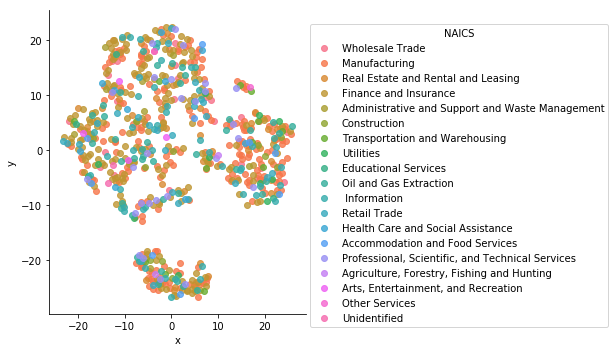

In [77]:
sns.lmplot( x="x", y="y", data=visualize_firms_cat6, hue="NAICS",fit_reg=False, legend=True)
plt.show()

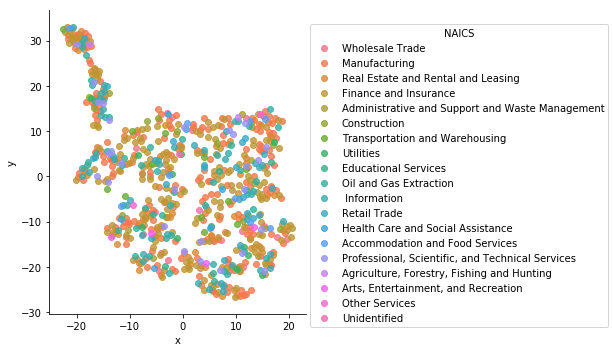

In [78]:
sns.lmplot( x="x", y="y", data=visualize_firms_cat7, hue="NAICS",fit_reg=False, legend=True)
plt.show()

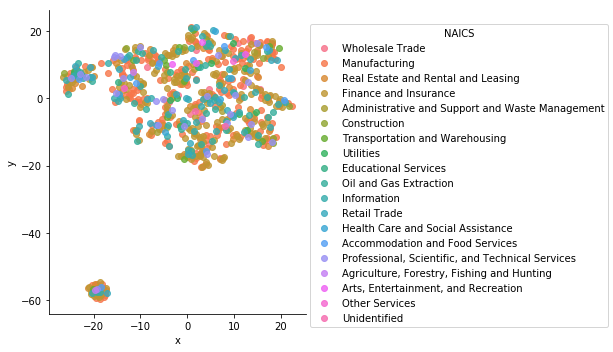

In [81]:
sns.lmplot( x="x", y="y", data=visualize_firms_total, hue="NAICS",fit_reg=False, legend=True)
plt.show()

In [82]:
visualize_firms_Manufacturing = visualize_firms[visualize_firms['NAICS']=='Manufacturing']
visualize_firms_FinanceAndInsurance = visualize_firms[visualize_firms['NAICS']=='Finance and Insurance']
visualize_firms_WholesaleTrade = visualize_firms[visualize_firms['NAICS']=='Wholesale Trade']
visualize_firms_Construction = visualize_firms[visualize_firms['NAICS']=='Construction']
visualize_firms_RealEstate = visualize_firms[visualize_firms['NAICS']=='Real Estate and Rental and Leasing']
visualize_firms_Administrative = visualize_firms[visualize_firms['NAICS']=='Administrative and Support and Waste Management']
visualize_firms_Transportation = visualize_firms[visualize_firms['NAICS'] == 'Transportation and Warehousing']
visualize_firms_Utilities = visualize_firms[visualize_firms['NAICS'] == 'Utilities']
visualize_firms_Educational = visualize_firms[visualize_firms['NAICS'] == 'Educational Services']
visualize_firms_Oil = visualize_firms[visualize_firms['NAICS'] == 'Oil and Gas Extraction']
visualize_firms_TransportationWarehousing = visualize_firms[visualize_firms['NAICS'] == 'Transportation and Warehousing']
visualize_firms_Information = visualize_firms[visualize_firms['NAICS'] == 'Information']
visualize_firms_RetailTrade = visualize_firms[visualize_firms['NAICS'] == 'Retail Trade']
visualize_firms_HealthCare = visualize_firms[visualize_firms['NAICS'] == 'Health Care and Social Assistance']
visualize_firms_Accommodation = visualize_firms[visualize_firms['NAICS'] == 'Accommodation and Food Services']
visualize_firms_Professional = visualize_firms[visualize_firms['NAICS'] == 'Professional, Scientific, and Technical Services']
visualize_firms_AgricultureForestryFishingHunting = visualize_firms[visualize_firms['NAICS'] == 'Agriculture, Forestry, Fishing and Hunting']
visualize_firms_ArtsEntertainment = visualize_firms[visualize_firms['NAICS'] == 'Arts, Entertainment, and Recreation']
visualize_firms_OtherServices = visualize_firms[visualize_firms['NAICS'] == 'Other Services']
visualize_firms_Unidentified = visualize_firms[visualize_firms['NAICS'] == 'Unidentified']


print("Manufacturing = ")
print(len(visualize_firms_Manufacturing))
print("Finance = ") 
print(len(visualize_firms_FinanceAndInsurance))
print("WholeTrade = ")
print(len(visualize_firms_WholesaleTrade))
print("Construction = ")
print(len(visualize_firms_Construction)) 
print("RealEstate = ")
print(len(visualize_firms_RealEstate))
print("Administrative = ")
print(len(visualize_firms_Administrative))
print("Transportaion = ")
print(len(visualize_firms_Transportation)) 
print("Utilities = ")
print(len(visualize_firms_Utilities)) 
print("Educational = ")
print(len(visualize_firms_Educational))
print("Oil = ")
print(len(visualize_firms_Oil)) 
print("TransportationWarehousing = ")
print(len(visualize_firms_TransportationWarehousing))
print("Information = ")
print(len(visualize_firms_Information))
print("RetailaTrade = ")
print(len(visualize_firms_RetailTrade))
print("HealthCare = ")
print(len(visualize_firms_HealthCare))
print("Accomodation = ")
print(len(visualize_firms_Accommodation))
print("Professional = ")
print(len(visualize_firms_Professional))
print("Agriculture = ")
print(len(visualize_firms_AgricultureForestryFishingHunting))
print("Entertainment = ")
print(len(visualize_firms_ArtsEntertainment))
print("OtherServices = ")
print(len(visualize_firms_OtherServices))
print("Unidentified = ")
print(len(visualize_firms_Unidentified))


Manufacturing = 
227
Finance = 
199
WholeTrade = 
23
Construction = 
11
RealEstate = 
44
Administrative = 
9
Transportaion = 
12
Utilities = 
11
Educational = 
3
Oil = 
45
TransportationWarehousing = 
12
Information = 
45
RetailaTrade = 
24
HealthCare = 
10
Accomodation = 
9
Professional = 
27
Agriculture = 
2
Entertainment = 
4
OtherServices = 
2
Unidentified = 
2


# Cosine plot for Manufacturing industries

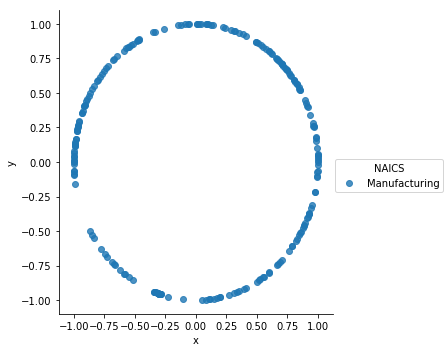

In [83]:
sns.lmplot( x="x", y="y", data=visualize_firms_Manufacturing, hue="NAICS",fit_reg=False, legend=True)
plt.show()

# Cosine plot for Finance and Insurance industries

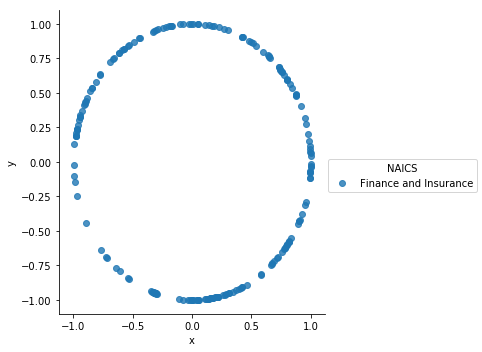

In [84]:
sns.lmplot( x="x", y="y", data=visualize_firms_FinanceAndInsurance, hue="NAICS",fit_reg=False, legend=True)
plt.show()

In [85]:
visualize_firms_cat6["State"]=firm_metadata["State"]

In [86]:
visualize_firms_cat7["State"]=firm_metadata["State"]

In [87]:
visualize_firms_total["State"]=firm_metadata["State"]

# Visualize firm embedding based on their states

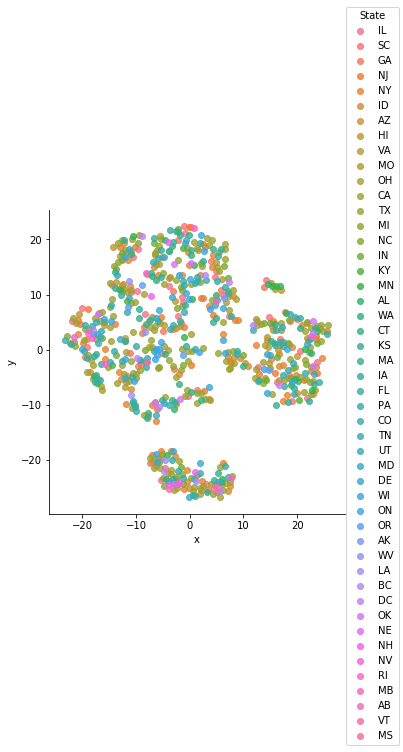

In [88]:
sns.lmplot( x="x", y="y", data=visualize_firms_cat6, hue="State",fit_reg=False, legend=True)
plt.show()

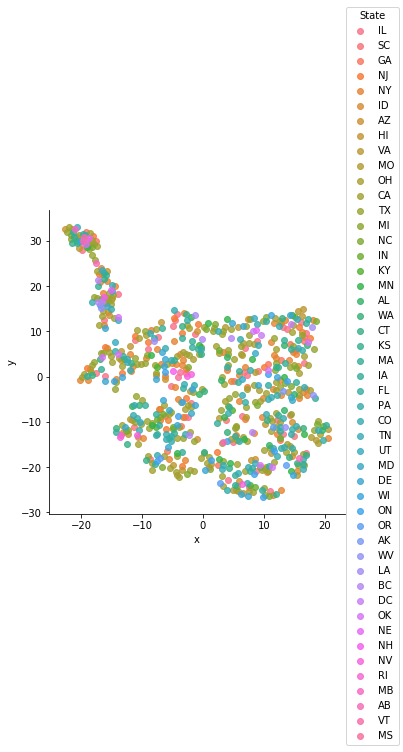

In [89]:
sns.lmplot( x="x", y="y", data=visualize_firms_cat7, hue="State",fit_reg=False, legend=True)
plt.show()

# Visualize firm embedding for both category cases combined 

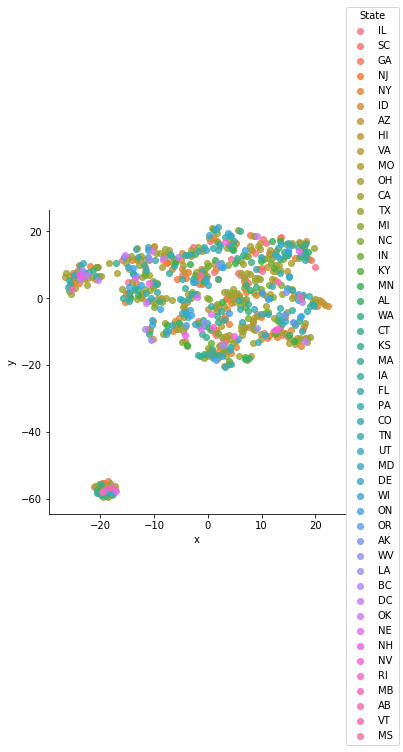

In [90]:
sns.lmplot( x="x", y="y", data=visualize_firms_total, hue="State",fit_reg=False, legend=True)
plt.show()

# Visualize embeddings against their rank in year 2013

In [91]:
visualize_firms_total["Rank"]=firm_metadata_rank["Rank"]

In [92]:
visualize_firms_total

,x,y,NAICS,State,Rank
0,10.851665,16.399012,Wholesale Trade,IL,B
1,10.165820,17.789186,Manufacturing,SC,B
2,7.484375,4.619727,Real Estate and Rental and Leasing,GA,A-
3,17.506714,0.692348,Manufacturing,IL,B
4,-23.955019,4.587607,Real Estate and Rental and Leasing,NJ,B
5,3.409336,-11.263844,Finance and Insurance,NY,B-
6,-6.475238,-9.931013,Administrative and Support and Waste Management,ID,B+
7,15.465430,-9.627832,Manufacturing,NY,B
8,18.352907,-11.817317,Construction,AZ,B-
9,-13.163547,14.932919,Construction,HI,C


# Remove firms with unknown ranking

In [93]:
visualize_firms_total_remove_null = visualize_firms_total[visualize_firms_total['Rank'].notnull()]
#visualize_firms_total['Rank']=visualize_firms_total['Rank'].fillna('Unknown')


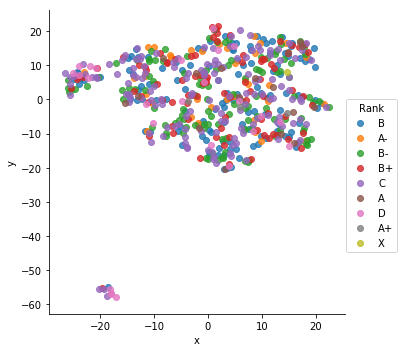

In [94]:
sns.lmplot( x="x", y="y", data=visualize_firms_total_remove_null, hue="Rank",fit_reg=False, legend=True)
plt.show()

# PCA plot 

In [95]:
df_plot = pd.DataFrame()
df_plot['x-pca'] = pca_result[:,0]
df_plot['y-pca'] = pca_result[:,1]
df_plot['x-tsne'] = tsne_results[:,0]
df_plot['y-tsne'] = tsne_results[:,1]

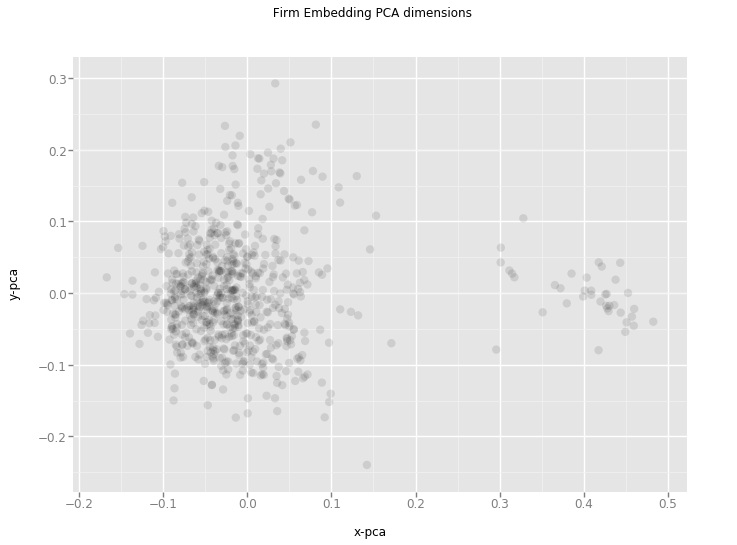

<ggplot: (-9223372036553979353)>

In [96]:
chart = ggplot( df_plot, aes(x='x-pca', y='y-pca') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle(" Firm Embedding PCA dimensions")
chart

# Tsne plot

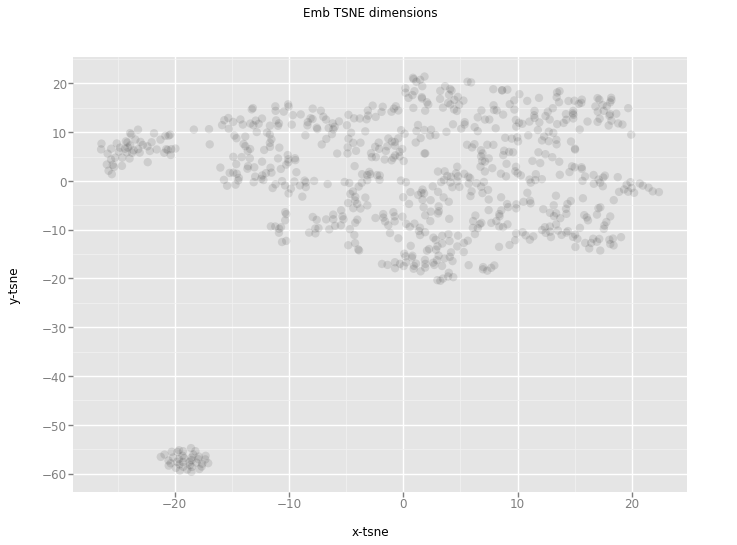

<ggplot: (301023657)>

In [97]:
chart = ggplot( df_plot, aes(x='x-tsne', y='y-tsne') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("Emb TSNE dimensions")
chart

In [98]:
df_plot = pd.DataFrame()
df_plot['x-pca'] = pca_result_cat7[:,0]
df_plot['y-pca'] = pca_result_cat7[:,1]
df_plot['x-tsne'] = tsne_results_cat7[:,0]
df_plot['y-tsne'] = tsne_results_cat7[:,1]

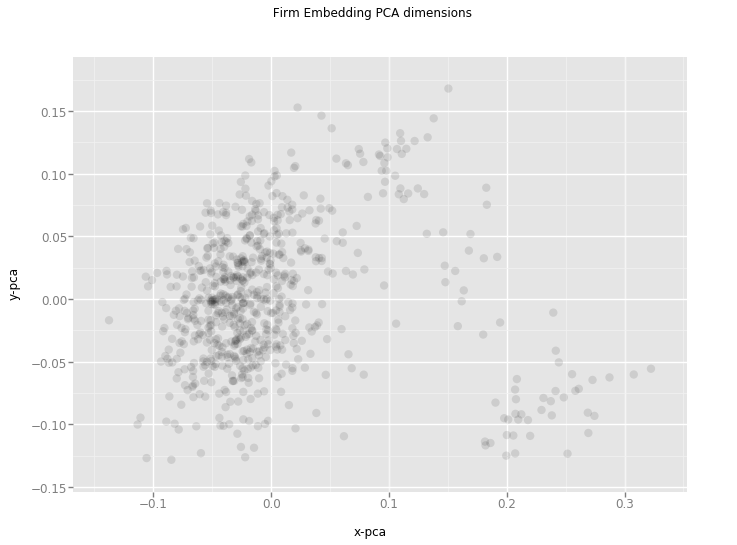

<ggplot: (-9223372036553618172)>

In [99]:
chart = ggplot( df_plot, aes(x='x-pca', y='y-pca') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle(" Firm Embedding PCA dimensions")
chart

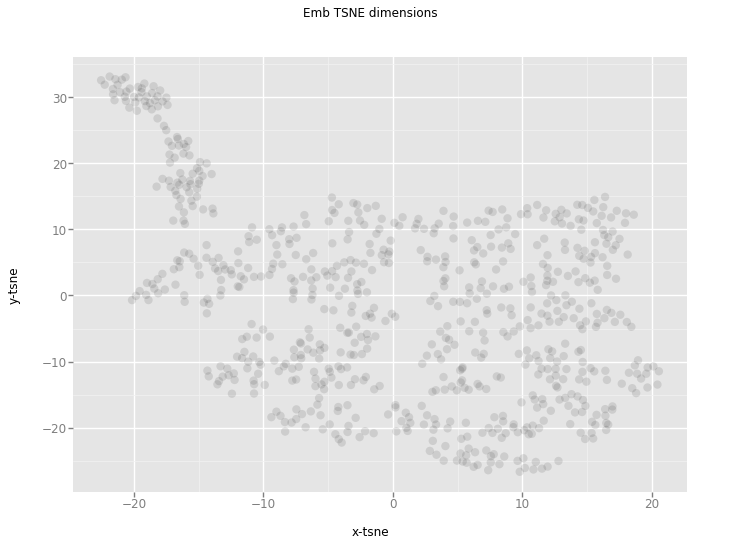

<ggplot: (301146870)>

In [100]:
chart = ggplot( df_plot, aes(x='x-tsne', y='y-tsne') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("Emb TSNE dimensions")
chart

In [101]:
tsne_results

array([[ 10.8516655,  16.399012 ],
       [ 10.16582  ,  17.789186 ],
       [  7.484375 ,   4.6197267],
       ...,
       [-13.386716 ,  11.75993  ],
       [ 14.67946  ,   8.076667 ],
       [ -6.1165195,  10.562491 ]], dtype=float32)

In [81]:
type(tsne_results)

numpy.ndarray